# Fabrício Ferreira da Silva RA: 231900 e Leandro Stival RA: 263013

# Atividade A11a - Transformações de intensidade

## Descrição

Nesta primeira parte vocês devem explorar diversas formas de normalizar uma imagem em intensidade e verificar o efeito da normalização na extração de atributos. A ideia é já usar o conjunto de imagens de lesões compartilhadas com vocês ao invés de uma foto qualquer.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
figures_path = 'C:\mo826\AVC\\'

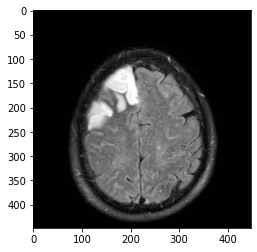

In [3]:
# acessar imagens do drive

fig1 = mpimg.imread(figures_path + '028_FLAIR24.bmp')

plt.imshow(fig1, cmap = 'gray')

In [4]:
import numpy as np

def normalize(f, range=[0,255]):

    f = np.asarray(f)
    range = np.asarray(range)
    if f.dtype.char in ['D', 'F']:
        raise Exception('error: cannot normalize complex data')
    faux = np.ravel(f).astype(float)
    minimum = faux.min()
    maximum = faux.max()
    lower = range[0]
    upper = range[1]
    if upper == lower:
        g = np.ones(f.shape) * maximum
    if minimum == maximum:
        g = np.ones(f.shape) * (upper + lower) / 2.
    else:
        g = (faux-minimum)*(upper-lower) / (maximum-minimum) + lower
    g = g.reshape(f.shape)

    if f.dtype == np.uint8:
        if upper > 255: 
            raise Exception('normalize: warning, upper valuer larger than 255. Cannot fit in uint8 image')
    if lower == 0 and upper == 255:
        g = g.astype(np.uint8)
    else:
        g = g.astype(f.dtype) # set data type of result the same as the input image
    return g

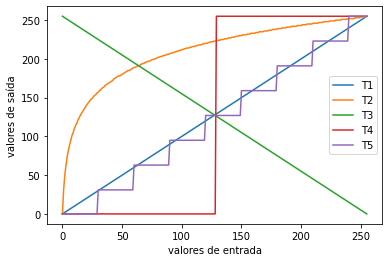

In [5]:
T1 = np.arange(256).astype('uint8') # função identidade
T2 = normalize(np.log(T1+1.)) # logaritmica - realce partes escuras
T3 = normalize(255 - T1) # negativo
T4 = normalize(T1 > 128) # threshold 128
T5 = normalize(T1//30) # reduz o número de níveis de cinza
plt.plot(T1)
plt.plot(T2)
plt.plot(T3)
plt.plot(T4)
plt.plot(T5)
plt.legend(['T1', 'T2', 'T3', 'T4','T5'], loc='right')
plt.xlabel('valores de entrada')
plt.ylabel('valores de saída')
plt.show()

Veja a aplicação destas tabelas na imagem "028_FLAIR24.bmp":

### T1: Função identidade <a name="section1d"></a>
Essa técnica para normalização dos valores mantem os valores originais da imagem quase que sem alteração quando analisados visualmente, dessa forma é possível notar que a qualidade dos detalhes se mantem.

Text(0.5, 1.0, 'T1[f]')

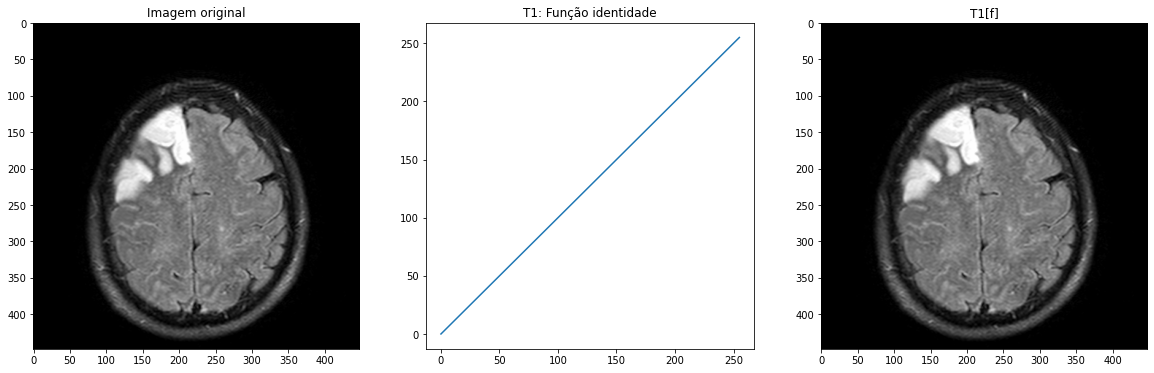

In [6]:
f1 = T1[fig1]

#Visualizando lado a lado
plt.figure(1, figsize=(20,6))

plt.subplot(1,3,1)
plt.imshow(fig1, cmap='gray')
plt.title('Imagem original')

plt.subplot(1,3,2)
plt.plot(T1)
plt.title('T1: Função identidade')

plt.subplot(1,3,3)
plt.imshow(fig1, cmap='gray')
plt.title('T1[f]')


### T2: Função logaritmica <a name="section1e"></a>
Como o nome já diz os valores dos tons de cinza irão seguir uma distribuição logaritmica, assim tornando o crescimento dos tons com uma curva onde valores altos tendem a aparecer de forma muito mais acentuada, sendo uma boa candidata para apresentar regiões claras (melhorando o destaque desses locais quando estão próximos de fundos escuros).

Text(0.5, 1.0, 'T2[f]')

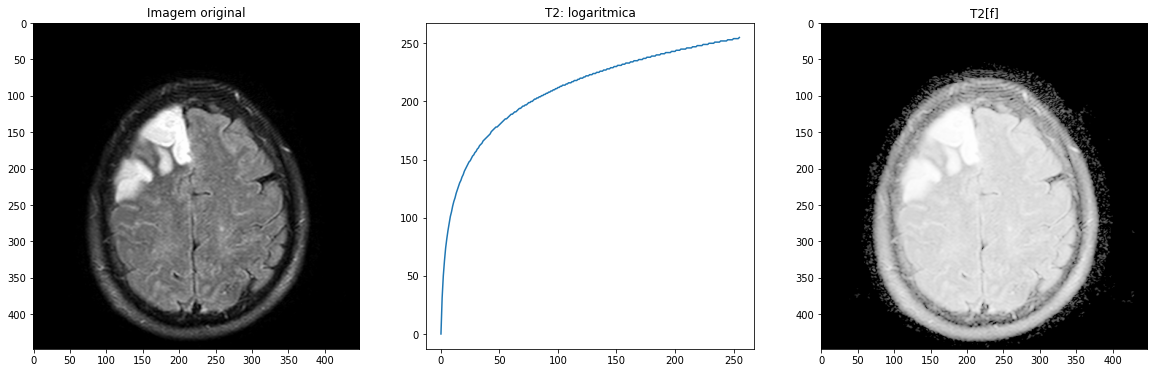

In [7]:
f2 = T2[fig1]

#Visualizando lado a lado
plt.figure(1, figsize=(20,6))

plt.subplot(1,3,1)
plt.imshow(fig1, cmap='gray')
plt.title('Imagem original')

plt.subplot(1,3,2)
plt.plot(T2)
plt.title('T2: logaritmica')

plt.subplot(1,3,3)
plt.imshow(f2, cmap='gray')
plt.title('T2[f]')



### T3: Função negativo
A inversão da tonalidade geralmente auxilia quando comparada lado a lado com a imagem original (inspeção visual humanada), pois, permite que essa mudança brusca de contraste traga a tona detalhes que poderiam passar dispercebidos originalmente.
<br>
<br>
Das funções aplicadas essa é a que apresenta a maior mudança de tons na imagem (pois inverte os valores). 


Text(0.5, 1.0, 'T3[f]')

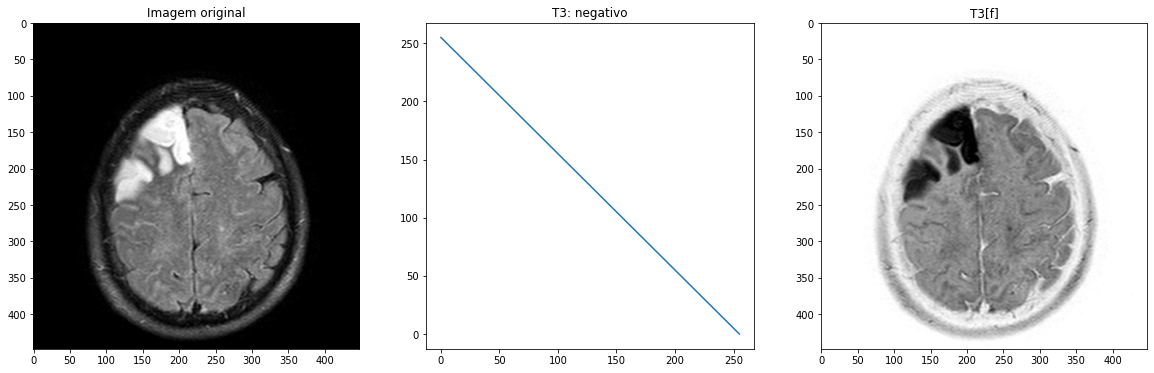

In [8]:
f3 = T3[fig1]
f3_print = f3.copy()
f3_print[:,:,3] = 255

#Visualizando lado a lado
plt.figure(1, figsize=(20,6))

plt.subplot(1,3,1)
plt.imshow(fig1, cmap='gray')
plt.title('Imagem original')

plt.subplot(1,3,2)
plt.plot(T3)
plt.title('T3: negativo')

plt.subplot(1,3,3)
plt.imshow(f3_print, cmap='gray')
plt.title('T3[f]')



### T4: Função threshold 128 <a name="section1g"></a>
Otima função para destacar regiões, porém, para definir um threshold é necessário um conhecimento préviso dos tons da região que se deseja destacar, uma vez que a imagem será binarizada e muita informação pode se perder.

Text(0.5, 1.0, 'T4[f]')

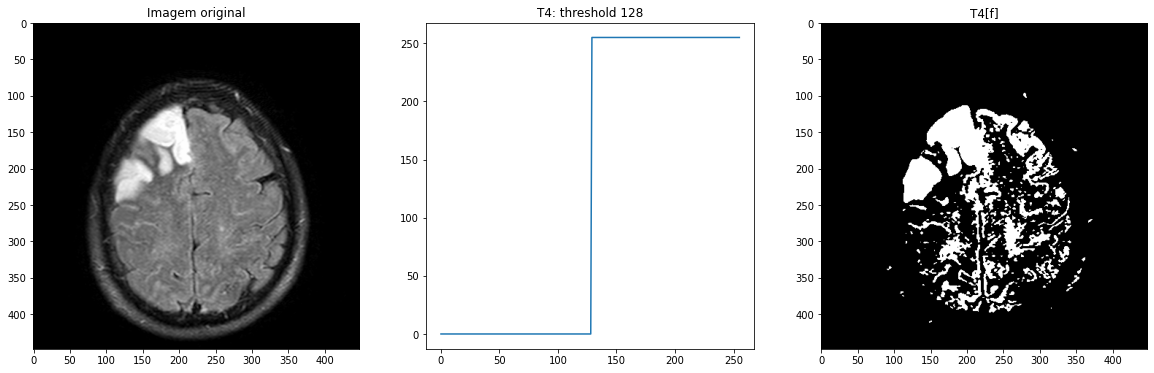

In [9]:
f4 = T4[fig1]


#Visualizando lado a lado
plt.figure(1, figsize=(20,6))

plt.subplot(1,3,1)
plt.imshow(fig1, cmap='gray')
plt.title('Imagem original')

plt.subplot(1,3,2)
plt.plot(T4)
plt.title('T4: threshold 128')

plt.subplot(1,3,3)
plt.imshow(f4, cmap='gray')
plt.title('T4[f]')


### T5: Função quantização <a name="section1h"></a>
Essa foi a função que escolhemos para realizar o treinamento da nossa SVM, por manter a aparecia original da imagem (sem grandes transformações), porém, com a diminuição dos tons de cinza presentes, assim causando alguns efeitos de aglutinação de pequenas regiões com detalhes.

Text(0.5, 1.0, 'T5[f]')

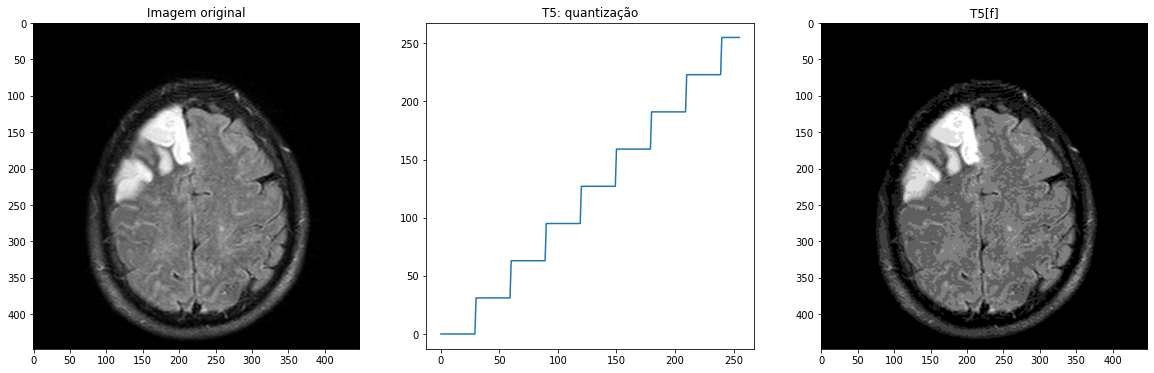

In [10]:
f5 = T5[fig1]


#Visualizando lado a lado
plt.figure(1, figsize=(20,6))

plt.subplot(1,3,1)
plt.imshow(fig1, cmap='gray')
plt.title('Imagem original')

plt.subplot(1,3,2)
plt.plot(T5)
plt.title('T5: quantização')

plt.subplot(1,3,3)
plt.imshow(f5, cmap='gray')
plt.title('T5[f]')

Observando o histograma de cada imagem após o mapaemento:

In [11]:
def plota_hist(h, bin_edges, index=0):

    w=255./nbins
    bin_centers = bin_edges[1:]-(w/2)
    plt.bar(bin_centers, h, width=w)
    plt.title(f'Normalização {norma_types[index]} bins: {nbins}')

In [12]:
norma_types = ['original', 'identidade', 'logaritmica', 'negativo', 'threshold', 'quantizada']

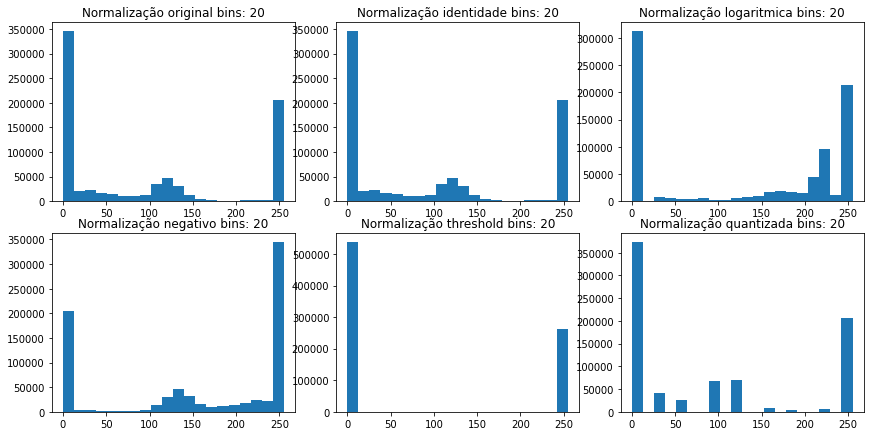

In [13]:
nbins = 20
h, bin_edges  = np.histogram(fig1,nbins,(0,255))
h1, bin_edges1 = np.histogram(f1,nbins,(0,255)) # identidade
h2, bin_edges2 = np.histogram(f2,nbins,(0,255)) # logaritmica
h3, bin_edges3 = np.histogram(f3,nbins,(0,255)) # negativo
h4, bin_edges4 = np.histogram(f4,nbins,(0,255)) # threshold
h5, bin_edges5 = np.histogram(f5,nbins,(0,255)) # quantização

fig, axs = plt.subplots(2,3, figsize=(12, 6))
plt.tight_layout() 
plt.subplot(2,3,1,)
plota_hist(h, bin_edges, 0)
plt.subplot(2,3,2)
plota_hist(h1, bin_edges1, 1)
plt.subplot(2,3,3)
plota_hist(h2, bin_edges2, 2)
plt.subplot(2,3,4)
plota_hist(h3, bin_edges3, 3)
plt.subplot(2,3,5)
plota_hist(h4, bin_edges4, 4)
plt.subplot(2,3,6)
plota_hist(h5, bin_edges5, 5)


O gráfico assima apresenta os histogramas para cada uma das funções, onde podemos observar que os valores possuem grandes variações depedendo da técnica aplicada, onde alguns histogramas acabaram ficando binalizados que é o caso da separação por limiar, enquanto outros mantem praticaente a mesma distribuição da imagens original (identidade, quantização e a logaritmica).
<br>
<br>
Onde cada um dessas técnicas possui utilidades e aplicações em que podem se sair melhor.

## Extração de caracteristicas

Nessa seção utilizamos das imagens normalizadas para extrair os atributos capazes de diferenciar as imagens através de seus atributos, para isso utilizamos métricas obtidas através da textura das imagens, assim gerando um *feature vector* capaz de representar nossas imagens.

In [14]:
import pandas as pd

from skimage.feature import graycomatrix, graycoprops
# from skimage.feature import greycomatrix, greycoprops

# Exemplo de um extrator de atributos de textura - LBP
from skimage.feature import local_binary_pattern

from glrlm import GLRLM

### Normalizando a imagem

In [15]:
#Lista das propriedades disponiveis para a matriz ce co-ocorrência.
properties = ['contrast', 'dissimilarity', 'homogeneity',
              'ASM', 'energy', 'correlation']

In [16]:
def get_GLRLM(img, size=8):
    """
    Função que recebe uma imagem e o tamanho da janela para extração
    de caracteristica, e retorna uma lista contendo as features
    extraídas através da Grey-level run-length matrix.
    """
    #Calculos de comprimento de corrida
    app = GLRLM()
    glrlm = app.get_features(img, size)

    #Extrai as features obtidas e adiciona a lista
    return glrlm.Features

In [17]:
def cocomatriz_metrics(image, distance=5, angles=0, levels=256):
    """
    Recebe uma imagem como parâmetro e retorna uma lista contendo todas as 
    métricas implementadas para a matriz de co-ocorrência.
    """
    prop_metrics = []
    for prop in properties:
        glcm_focus = graycomatrix(image, distances=[distance], angles=[angles], levels=levels, symmetric=True, normed=True)
        coco_matriz = graycoprops(glcm_focus, prop=prop)
        prop_metrics.append(coco_matriz[0][0])
    return prop_metrics

In [18]:
def list_to_disct(list_image_metrics):
    """
    Cria o dicionário contendo os valores de cada feature
    para cada uma das amostras, sendo o parâmetro de entrada
    a lista das features para a imagem e o retorn a versão
    em dicioário.
    """

    #Dicionario contendo as features
    dict_img_features = {}

    #Converte a lista de metricas em um dicionario (para add ao dataframe)
    for idx, features in enumerate(df_features_columns):
        dict_img_features[features] = list_image_metrics[idx]

    return dict_img_features

In [19]:
def get_features(img, img_class=1):
    """
    Recebe a imagem e qual classe ela percente (1 = EM, 0 = AVC)
    e realiza a extração das features utilizando a Matriz de 
    Co-ocorrência e o comprimento de corrida.
    
    Returnando o dicionário gerado pela função 'list_to_disct'
    """
    list_image_metrics = []
    
    #Pega os valores da matriz de co-ocorrência
    list_image_metrics.extend(cocomatriz_metrics(img))

    #Pega os valores das métricas de comprimento de corrida
    list_image_metrics.extend(get_GLRLM(img))

    #Adiciona a classe da amostra
    list_image_metrics.extend([img_class])

    return list_to_disct(list_image_metrics)

### Extraindo caracteristicas para todas as imagens de treino

Utilizando as funções definidas anteriormente serão aplicadas as todas as imagens do cojunto de treinamento, para criar o nosso conjunto de treinamento para a SVM.
<br>
<br>
As caracteristicas selecionadas foram as mesmas do trabalho anterior, sendo necessário apenas criar funções que cálculacem as matriz de co-ocorrência e o comprimento de corrida de forma prática para todas as imagens em um *loop*, assim tornando o processo automátizado para qualquer conjunto.
<br><br>
Das duas técnicas orma obtidas $11$ features sendo $5$ de matriz de co-ocorrência (alterando o parâmetro 'prop') e mantendo a distância igual  a 5 em um angulo de 0º (observando os valores a direita do pixel), enquanto para o comprimento de corrida foi gerado $5$ valores que representam valores de energia e entropia da imagem.

In [20]:
#Dataframe contendo as features que representarão a imagem
df_features_columns = ['contrast', 'dissimilarity', 'homogeneity', 'ASM',
                     'energy', 'correlation','SRE', 'LRE', 'GLU', 'RLU', 
                     'RPC', 'class']

df_features = pd.DataFrame(columns=df_features_columns)

### Lendo todas as imagens de cada classe

In [21]:
import os

In [22]:
#Caminhos onde as imagens estão salvas
AVC_path = 'C:\mo826\AVC\\'
EM_path = 'C:\mo826\EM\\'
test_path = 'C:\mo826\Test\\'

In [24]:
#Lista contendo o nome de todas as imagens de Teste
test_images_name = []
for images in os.listdir(test_path):
    test_images_name.append(images)
len(test_images_name)

450

In [25]:
#Lista contendo o nome de todas as imagens de AVC
AVC_images_name = []
for images in os.listdir(AVC_path):
    AVC_images_name.append(images)
len(AVC_images_name)

2056

In [26]:
#Lista contendo o nome de todas as imagens de EM
EM_images_name = []
for images in os.listdir(EM_path):
    EM_images_name.append(images)
len(EM_images_name)

2974

### Extraindo as caracteristicas

In [27]:
#Lib para medir o tempo das interações
import tqdm

In [30]:
#Lista com as imagens de teste que contem máscara
real_masks_test = []
for name in test_images_name:
    if name.split('.')[0].split('_')[-1] == 'mask':
        if name.replace('_mask','') in test_images_name or name.replace('_mask','').replace('png','bmp') in test_images_name:
            real_masks_test.append(name)

In [31]:
pd.DataFrame(real_masks_test).to_csv("test_images.csv")

In [32]:
#Loop para extrair as features de todas as imagens de teste
img_without_mask = []
list_of_dicts_test = []

for image in tqdm.tqdm(real_masks_test):

    # try:
    if image.split('.')[0].split('_')[-1] == 'mask':
        if image.split('.')[1] == 'png':
            #Lendo a máscara original
            mask = plt.imread(test_path + image, 0)
        else:
            mask = mpimg.imread(test_path + image)

        #Lendo a imagem
        try:
            img = plt.imread(test_path + image.replace('_mask',''), 0)
        except:
            img = mpimg.imread(test_path  + image.replace('_mask','').replace('png','bmp'))

        #Normaliza os valores da imagem
        img_normalized = normalize(img//30)

        #Aplicando a máscara sobre a imagem original
        img_masked = mask * img_normalized[:,:,0]
        
        #Convertendo a imagem para inteiros
        img_masked = (img_masked * 255).astype('int')

        #Obtem as features da imagem
        img_features = get_features(img_masked, img_class=0)
        #Adciona os valores ao DataFrame das métricas
        list_of_dicts_test.append(img_features)

100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [16:44<00:00,  4.46s/it]


In [33]:
#Sala o Dataframe contendo os dados de test
df_metrics = pd.DataFrame(list_of_dicts_test)
df_metrics.to_csv('Test_metrics_mask.csv')

In [26]:
#Lista com as imagens de AVC que contem máscara
real_masks_AVC = []
for name in AVC_images_name:
    if name.split('.')[0].split('_')[-1] == 'mask':
        if name.replace('_mask','') in AVC_images_name or name.replace('_mask','').replace('png','bmp') in AVC_images_name:
            real_masks_AVC.append(name)

In [27]:
pd.DataFrame(real_masks_AVC).to_csv("AVC_images.csv")

In [28]:
#Loop para extrair as features de todas as imagens de AVC
img_without_mask = []
list_of_dicts = []

for image in tqdm.tqdm(real_masks_AVC):

    # try:
    if image.split('.')[0].split('_')[-1] == 'mask':
        if image.split('.')[1] == 'png':
            #Lendo a máscara original
            mask = plt.imread(AVC_path + image, 0)
        else:
            mask = mpimg.imread(AVC_path + image)

        #Lendo a imagem
        try:
            img = plt.imread(AVC_path + image.replace('_mask',''), 0)
        except:
            img = mpimg.imread(AVC_path  + image.replace('_mask','').replace('png','bmp'))

        #Normaliza os valores da imagem
        img_normalized = normalize(img//30)

        #Aplicando a máscara sobre a imagem original
        img_masked = mask * img_normalized[:,:,0]
        
        #Convertendo a imagem para inteiros
        img_masked = (img_masked * 255).astype('int')

        #Obtem as features da imagem
        img_features = get_features(img_masked, img_class=0)
        #Adciona os valores ao DataFrame das métricas
        list_of_dicts.append(img_features)

100%|████████████████████████████████████████████████████████████████████████████████| 511/511 [36:55<00:00,  4.34s/it]


In [29]:
#Lista das imagens de EM que possuem máscara no conjunto disponibilizado
real_masks_EM = []
for name in EM_images_name:
    if name.split('.')[0].split('_')[-1] == 'mask':
        if name.replace('_mask','') in EM_images_name:
            real_masks_EM.append(name)

In [30]:
pd.DataFrame(real_masks_EM).to_csv("EM_images.csv")

In [32]:
#Loop para extração das features das imagens da classe EM
img_without_mask = []
list_of_dicts_EM = []

for image in tqdm.tqdm(real_masks_EM):

    # try:
    if image.split('.')[0].split('_')[-1] == 'mask':
        if image.split('.')[1] == 'png':
            #Lendo a máscara original
            mask = plt.imread(EM_path  + image, 0)
        else:
            mask = mpimg.imread(EM_path + image)

        #Lendo a imagem
        try:
            img = plt.imread(EM_path + image.replace('_mask',''), 0)
        except:
            img = mpimg.imread(EM_path + image.replace('_mask','').replace('png','bmp'))
            
        
        #Normaliza os valores da imagem
        img_normalized = normalize(img//30)

        #Aplicando a máscara sobre a imagem original
        img_masked = mask * img_normalized[:,:,0]
        
        #Convertendo a imagem para inteiros
        img_masked = (img_masked * 255).astype('int')

        #Obtem as features da imagem
        img_features = get_features(img_masked, img_class=0)
        #Adciona os valores ao DataFrame das métricas
        list_of_dicts_EM.append(img_features)

100%|████████████████████████████████████████████████████████████████████████████████| 537/537 [43:57<00:00,  4.91s/it]


## Salvando as featureso obtidas
Com as técnicas para medir as diferenças entre as imagens, o próximo passo é salvar essa informação para que possa se fornecida como entrada para o classificador SVM.

In [33]:
#Sala o Dataframe contendo os dados de EM
df_metrics_EM = pd.DataFrame(list_of_dicts_EM)
df_metrics_EM.to_csv('EM_metrics_mask.csv')

In [34]:
#Sala o Dataframe contendo os dados de AVC
df_metrics = pd.DataFrame(list_of_dicts)
df_metrics.to_csv('AVC_metrics_mask.csv')